In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
# Load the dataset
file_path = "advertising.csv"
df = pd.read_csv(file_path)

In [6]:
# Display basic dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   City                      998 non-null    object 
 5   Gender                    1009 non-null   object 
 6   Country                   996 non-null    object 
 7   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 63.2+ KB


In [12]:
# Display first few rows
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Gender,Country,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Wrightburgh,Female,Tunisia,0
1,NaN,31.0,68441.85,193.77,West Jodi,Male,Nauru,0
2,69.47,26.0,59785.94,236.50,Davidton,Female,San Marino,0
3,74.15,29.0,54806.18,245.89,West Terrifurt,Male,Italy,0
4,68.37,35.0,73889.99,225.58,South Manuel,Female,Iceland,0


In [14]:
# Handling categorical variables if needed
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [16]:
# Handling missing values
df = df.dropna()

In [18]:
# Define features and target variable
X = df.drop(columns=[df.columns[-1]])  # Assuming last column is the target
y = df[df.columns[-1]]

In [20]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Standardizing the numerical features for Gaussian Naive Bayes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Initialize models
gaussian_nb = GaussianNB()
multinomial_nb = MultinomialNB()
bernoulli_nb = BernoulliNB()

In [26]:
# Train and evaluate Gaussian Naive Bayes
gaussian_nb.fit(X_train_scaled, y_train)
y_pred_gaussian = gaussian_nb.predict(X_test_scaled)
print("\nGaussian Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gaussian))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gaussian))
print("Classification Report:\n", classification_report(y_test, y_pred_gaussian))


Gaussian Naive Bayes Performance:
Accuracy: 0.9744897959183674
Confusion Matrix:
 [[99  1]
 [ 4 92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       100
           1       0.99      0.96      0.97        96

    accuracy                           0.97       196
   macro avg       0.98      0.97      0.97       196
weighted avg       0.97      0.97      0.97       196



In [28]:
# Train and evaluate Multinomial Naive Bayes
multinomial_nb.fit(X_train, y_train)
y_pred_multinomial = multinomial_nb.predict(X_test)
print("\nMultinomial Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_multinomial))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_multinomial))
print("Classification Report:\n", classification_report(y_test, y_pred_multinomial))


Multinomial Naive Bayes Performance:
Accuracy: 0.5918367346938775
Confusion Matrix:
 [[60 40]
 [40 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.60      0.60       100
           1       0.58      0.58      0.58        96

    accuracy                           0.59       196
   macro avg       0.59      0.59      0.59       196
weighted avg       0.59      0.59      0.59       196



In [30]:
# Train and evaluate Bernoulli Naive Bayes
bernoulli_nb.fit(X_train, y_train)
y_pred_bernoulli = bernoulli_nb.predict(X_test)
print("\nBernoulli Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_bernoulli))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bernoulli))
print("Classification Report:\n", classification_report(y_test, y_pred_bernoulli))


Bernoulli Naive Bayes Performance:
Accuracy: 0.4642857142857143
Confusion Matrix:
 [[45 55]
 [50 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.45      0.46       100
           1       0.46      0.48      0.47        96

    accuracy                           0.46       196
   macro avg       0.46      0.46      0.46       196
weighted avg       0.46      0.46      0.46       196



In [32]:
# Visualizing the confusion matrix for all models
models = ["Gaussian", "Multinomial", "Bernoulli"]
predictions = [y_pred_gaussian, y_pred_multinomial, y_pred_bernoulli]

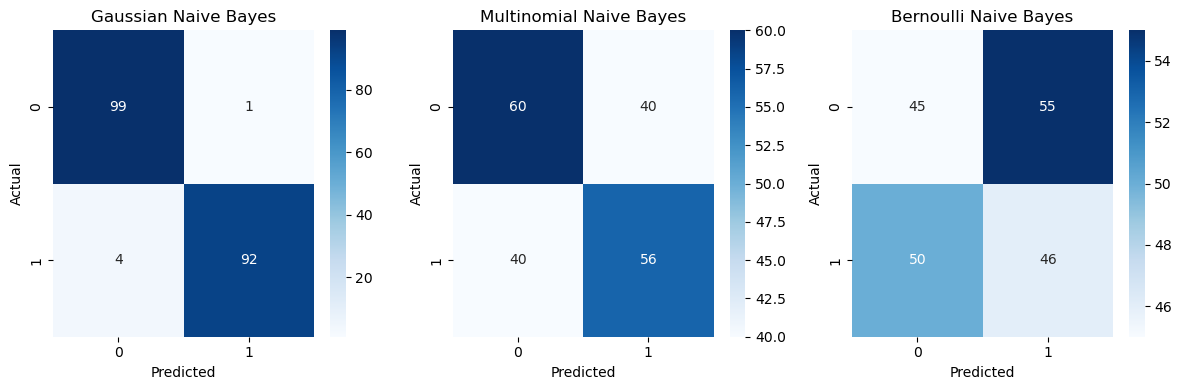

In [34]:
plt.figure(figsize=(12, 4))
for i, (name, pred) in enumerate(zip(models, predictions)):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Naive Bayes")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()